# By: Wisnu Setia Nugroho
Student Number : pyim011onl017
    ##Loan Prediction in Data Science Projects

Proses Loan Status ialah proses yang memakan waktu, sehingga otomatisasi diperlukan untuk mendapatkan hasil yang lebih cepat dan lebih baik. Pertama-tama debitur mengajukan pinjaman rumah kemudian perusahaan memvalidasi kelayakan pelanggan untuk pinjaman. Perusahaan ingin mengotomatiskan proses kelayakan pinjaman (real time) berdasarkan data dilakukan dengan rincian pelanggan yang diberikan saat mengisi formulir seperti gender, Married, dependents, Education, Self Employed, Loan_Amount_Term, Credit History, Applicant Income, Coapplicant Income dan Loan Amount. Kami menggunakan model klasifikasi untuk menargetkan pelanggan yang memenuhi syarat untuk jumlah pinjaman dengan akurasi terbaik.

**COLUMN DESCRIPTION OF DATASET**

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education :Applicant Education (Graduate/ Under Graduate)

Self_Employed :Self employed (Y/N)

ApplicantIncome :Applicant income

CoapplicantIncome:Coapplicant income

LoanAmount :Loan amount in thousands

Loan_Amount_Term :Term of loan in months

Credit_History :Credit history meets guidelines

Property_Area :Urban/ Semi Urban/ Rural

Loan_Status :Loan approved (Y/N)

**Objective**

Tujuannya adalah untuk menggunakan data aplikasi pinjaman historis untuk memprediksi apakah pemohon akan memenuhi syarat untuk pinjaman atau tidak berdasarkan fitur yang disebutkan. Ini adalah tugas klasifikasi terawasi standar:

1. Supervised: Label disertakan dalam data pelatihan dan tujuannya adalah melatih model untuk belajar memprediksi label dari fitur
2. Classification: Label adalah variabel biner, Y (Memenuhi Syarat), N (Tidak Memenuhi Syarat)

In [96]:
# Get your import statement here
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

#for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

#for modeling
##Decesion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix

##Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

#NAIVE BAYES CLASSIIFIER
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


**LOADING DATASET**

In [49]:
img_train_path=os.path.abspath('train')
img_test_path=os.path.abspath('test')

csv_train=os.path.abspath('https://raw.githubusercontent.com/wisnusnugroho/Hacktiv8/main/Data/train.csv')
csv_test=os.path.abspath('https://raw.githubusercontent.com/wisnusnugroho/Hacktiv8/main/Data/test.csv')
csv_train
csv_test

'C:\\Users\\ASUS\\Downloads\\test.csv'

In [50]:
df_train=pd.read_csv(csv_train)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [123]:
df_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [125]:
df_test=pd.read_csv(csv_test)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [126]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [127]:
df_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# Exploratory Data Analysis
## DATA VISUALIZATION FOR ANALYSING DATA

In [129]:
#Target variable (Loan Status)
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [57]:
df_train = df_train.drop('Loan_ID', axis=1) ## Dropping Loan ID
category_col=['Gender','Married','Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(category_col)
numeric_col=['ApplicantIncome','CoapplicantIncome','LoanAmount']
print(numeric_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


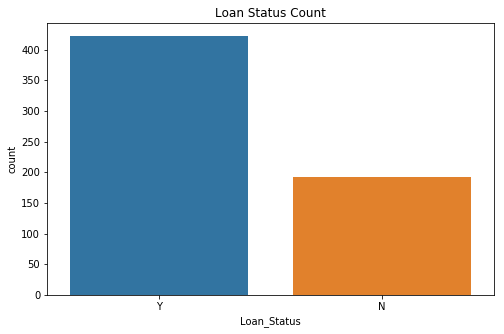

In [58]:
#checking the distribution of the target column (Loan Status)
plt.figure(figsize=(8,5))
plt.title('Loan Status Count')
sns.countplot(data=df_train,x='Loan_Status');

The target column is distributed between 69% and 31% for YES and NO respectively. The data seems to be fairely balanced

In [59]:
#checking the distribution of the target column (Loan Status)
px.pie(data_frame=df_train,names='Loan_Status',title='Distribution of Loan Status')

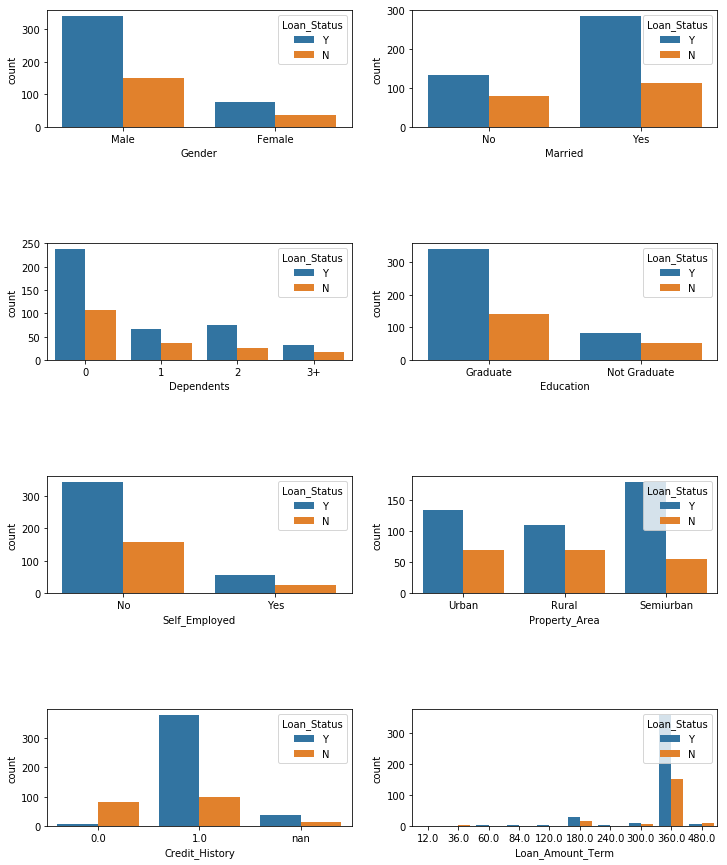

In [60]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(category_col):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_train,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Plot di atas menggambarkan deskripsi berikut: 
1. Loan Approval Status: Sekitar 2/3 dari pelamar telah diberikan pinjaman. 
2. Sex: Pria lebih banyak daripada Wanita (sekitar 3x) 
3. Martial Status: 2/3 dari populasi di dataset Menikah; Pelamar yang sudah menikah lebih mungkin untuk diberikan pinjaman.
4. Dependents: Sebagian besar penduduk tidak memiliki tanggungan dan juga kemungkinan besar akan menerima pinjaman. 
5. Education: Sekitar 5/6 populasi adalah Lulusan dan lulusan memiliki proporsi persetujuan pinjaman yang lebih tinggi 
6. Employment: 5/6 populasi tidak bekerja sendiri. 
7. Properti Area: Lebih banyak pelamar dari Semi-urban dan juga kemungkinan akan diberikan pinjaman. Pemohon dengan riwayat kredit jauh lebih mungkin untuk diterima. 
8. Loan Amount Term: Mayoritas pinjaman yang diambil adalah selama 360 Bulan (30 tahun). 

Selanjutnya, menganalisis Kolom Numerik:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


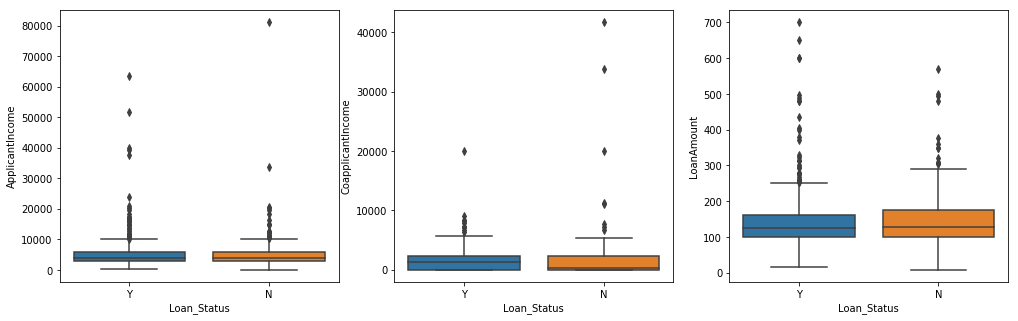

In [61]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numeric_col):
    sns.boxplot(y=cat_col,data=df_train,x='Loan_Status',ax=axes[idx])

print(df_train[numeric_col].describe())
plt.subplots_adjust(hspace=1)

**ApplicantIncome**

In [130]:
df_train[['ApplicantIncome']].describe()

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


(array([  17.,  224.,  182.,   81.,   29.,   25.,   15.,    7.,    5.,
           7.,    6.,    3.,    5.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    1.,    2.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([   150.,   1767.,   3384.,   5001.,   6618.,   8235.,   9852.,
         11469.,  13086.,  14703.,  16320.,  17937.,  19554.,  21171.,
         22788.,  24405.,  26022.,  27639.,  29256.,  30873.,  32490.,
         34107.,  35724.,  37341.,  38958.,  40575.,  42192.,  43809.,
         45426.,  47043.,  48660.,  50277.,  51894.,  53511.,  55128.,
         56745.,  58362.,  59979.,  61596.,  63213.,  64830.,  66447.,
         68064.,  69681.,  71298.,  72915.,  74532.,  76149.,  77766.,
         79383.,  81000.]),
 <a list of 50 Patch objects>)

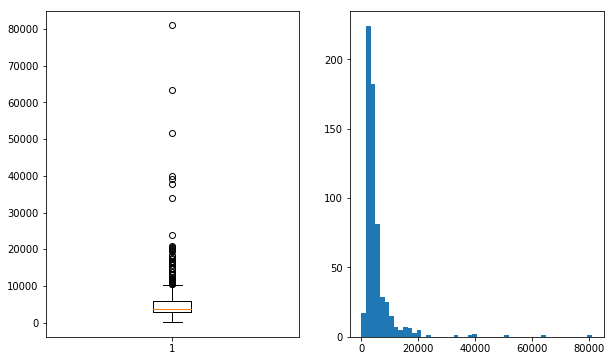

In [132]:
fig ,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].boxplot(df_train['ApplicantIncome'])
ax[1].hist(df_train['ApplicantIncome'],bins=50)

In [ ]:
Boxplot memperlihatkan bahwa banyak outlier/nilai ekstrim

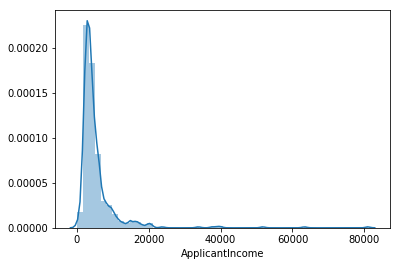

In [134]:
sns.distplot(df_train.ApplicantIncome)

In [ ]:
data dalam distribusi ApplicantIncome adalah ke arah kiri yang berarti tidak berdistribusi normal

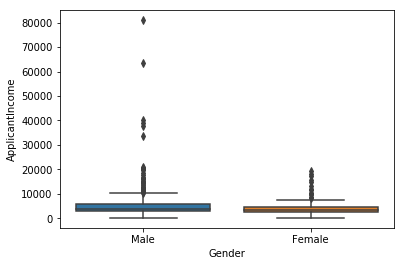

In [138]:
sns.boxplot(data=df_train,y='ApplicantIncome',x='Gender')

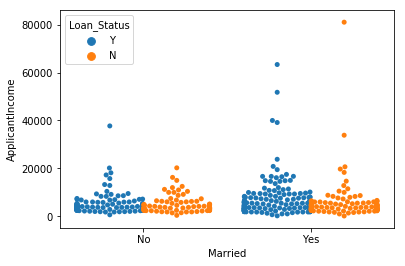

In [139]:
sns.swarmplot(y='ApplicantIncome',x='Married',hue='Loan_Status',data=df_train,dodge=True)

**CoapplicantIncome**

In [141]:
df_train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

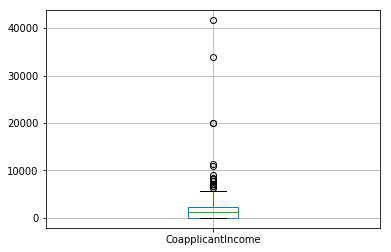

In [143]:
df_train[['CoapplicantIncome']].boxplot()

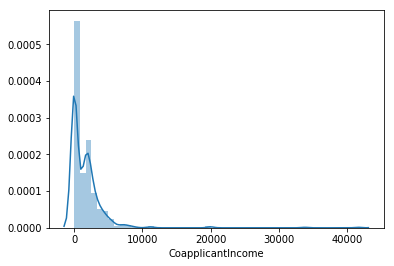

In [144]:
sns.distplot(df_train.CoapplicantIncome)

distribusi sebagai CoapplicantIncome. Mayoritas CoapplicantIncome berkisar antara 0 hingga 5000. terlihat juga banyaknya outlier dalam CoapplicantIncome serta data tidak terdistribusi normal.

**LoanAmount**

In [145]:
df_train[['LoanAmount']].describe()

,LoanAmount
count,592.000000
mean,146.412162
std,85.587325
min,9.000000
25%,100.000000
50%,128.000000
75%,168.000000
max,700.000000


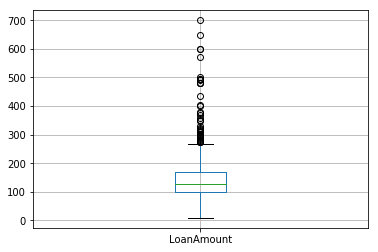

In [146]:
df_train[['LoanAmount']].boxplot()

terdapat banyak outlier pada variabel ini namun distribusinya cukup normal.

In [62]:
df_train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Correlations in data

In [149]:
corr=df_train.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878
LoanAmount,0.570909,0.188619,1.000000,0.039447
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000


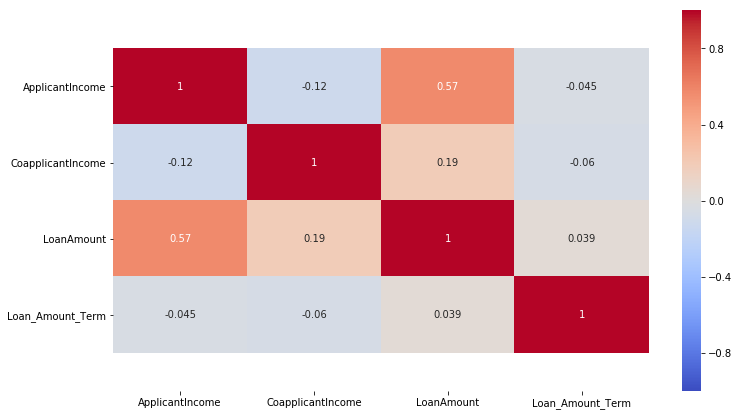

In [74]:

plt.figure(figsize=(12,7))
ax = sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True,vmax=1,vmin=-1);
# fix for mpl bug that cuts off top/bottom of seaborn viz

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

## Preprocessing Data

Data input perlu diproses terlebih dahulu sebelum kami memasukkannya ke model. Hal-hal berikut perlu diperhatikan: Encoding Categorical Features. Menghitung nilai yang hilang

In [52]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [63]:
#### Encoding categrical Features: ##########
df_train_encoded = pd.get_dummies(df_train,drop_first=True)
df_train_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_nan,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1,0,0,0,0,0,0,1,0,0,1,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,0,1,1


In [64]:
########## Split Features and Target Varible ############
X = df_train_encoded.drop('Loan_Status_Y',axis=1)
y = df_train_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

############### Handling/Imputing Missing values #############
imp = Imputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

MODEL: Decision Tree

In [65]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.650062090349
Validation Mean Accuracy:  0.702749990968


Masalah Overfitting dapat kita lihat dari metrik di atas bahwa Training Accuracy > Test Accuracy dengan pengaturan default dari Decision Tree classifier. Oleh karena itu, modelnya overfit. kita coba menggunakan beberapa setingan Hyper-parameter untuk mencari hasil lebih baiknya.

In [156]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)
Tuning_Max_depth_df


,Max_Depth,Training Accuracy,Training F1,Validation Accuracy,Validation F1
0,1,0.763747,0.838440,0.763834,0.699521
1,2,0.798371,0.869908,0.792261,0.704544
2,3,0.810591,0.877147,0.780119,0.694482
3,4,0.828921,0.886486,0.775954,0.698054
4,5,0.839104,0.892517,0.767895,0.691741
5,6,0.851324,0.897328,0.741425,0.677294
6,7,0.879837,0.917713,0.737425,0.675687
7,8,0.902240,0.931034,0.721056,0.663351
8,9,0.926680,0.947977,0.725159,0.654945
9,10,0.955193,0.967930,0.708853,0.661759


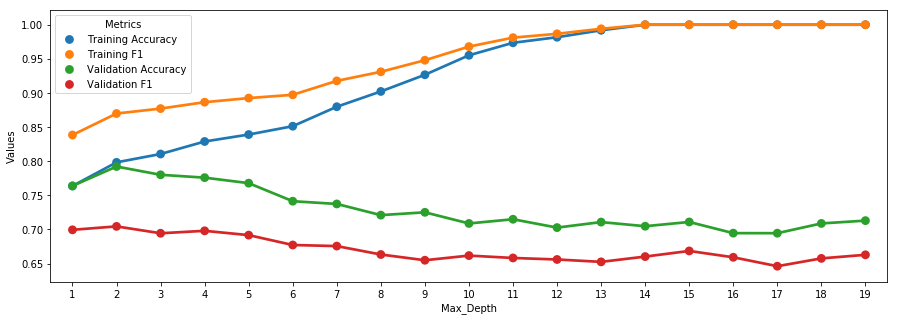

In [157]:

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

Dari grafik di atas, dapat disimpulkan bahwa dengan menetapkan 'Max_Depth' = 3 menghasilkan akurasi Uji optimum dan skor F1 Akurasi Uji Optimum ~ 0,8; Skor F1 Optimal: ~0,7

In [159]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)
Tuning_min_samples_leaf_df

,Min_Samples_leaf,Training Accuracy,Training F1,Validation Accuracy,Validation F1
0,1,0.810591,0.877147,0.780078,0.699818
1,4,0.800407,0.870370,0.773976,0.689096
2,7,0.798371,0.869908,0.780078,0.698451
3,10,0.798371,0.869908,0.782119,0.700306
4,13,0.798371,0.869908,0.788241,0.706937
5,16,0.798371,0.869908,0.792282,0.708996
6,19,0.798371,0.869908,0.798363,0.710452
7,22,0.798371,0.869908,0.798363,0.710452
8,25,0.798371,0.869908,0.798363,0.710452
9,28,0.798371,0.869908,0.798363,0.710452


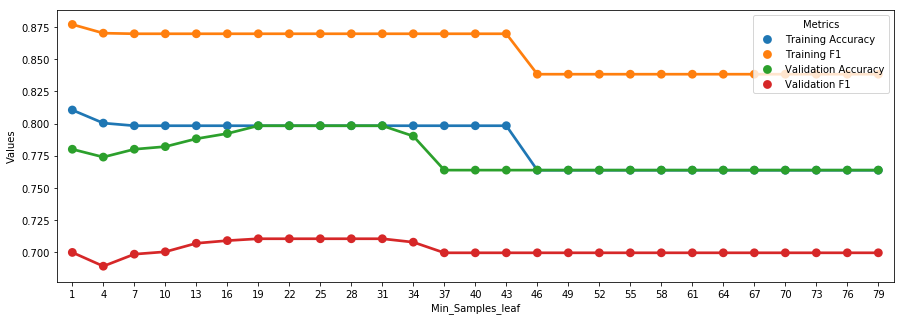

In [160]:

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

Dari plot di atas, memilih Min_Samples_leaf hingga 34 untuk meningkatkan akurasi pengujian. Mari kita gunakan Decision Tree classifier ini pada data uji yang tidak terlihat dan evaluate Test Accuracy, F1 Score and Confusion Matrix

In [161]:
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.853658536585
Test F1 Score:  0.903225806452
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


    MODEL: Logistic Regression

In [162]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)
Threshold_logreg_df


,Decision Threshold,Test Accuracy,Test F1,Training Accuracy,Training F1
0,0.1,0.699187,0.821256,0.686354,0.814010
1,0.2,0.723577,0.831683,0.723014,0.831683
2,0.3,0.796748,0.870466,0.775967,0.858612
3,0.4,0.861789,0.908108,0.796334,0.868421
4,0.5,0.845528,0.896175,0.788187,0.860590
5,0.6,0.804878,0.863636,0.775967,0.848066
6,0.7,0.796748,0.852071,0.733198,0.803008
7,0.8,0.601626,0.620155,0.570265,0.595010


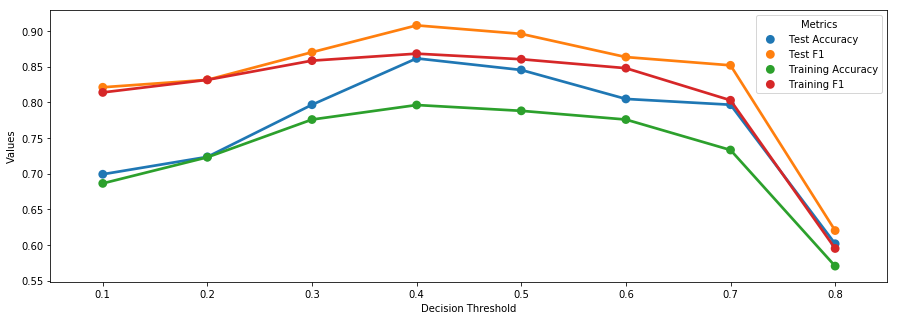

In [163]:
plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Regresi Logistik sedikit lebih baik daripada Decision Tree. Berdasarkan kurva Test/Train di atas, kita dapat mempertahankan ambang batas ke 0,4. 
Kemudian kita lihat Logistic Regression Confusion Matrix

In [164]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.861788617886
Test F1 Score:  0.908108108108
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


In [165]:
print("y_Predict",y_pred_test_thresh)
print("y_test",y_test)

y_Predict [ 0.18707557  0.88736502  0.73695694  0.73066714  0.87635566  0.79941249
  0.82737323  0.79182326  0.75904778  0.70475301  0.84978753  0.80774234
  0.83289163  0.7991713   0.28668712  0.23907592  0.68851402  0.34863387
  0.29166256  0.77523065  0.271629    0.55709523  0.36138391  0.85240969
  0.85335242  0.79863837  0.87983821  0.71169037  0.29399506  0.79156371
  0.81181759  0.87918374  0.72513244  0.58979787  0.75290561  0.80686372
  0.19042     0.90621597  0.78045792  0.85321448  0.84943293  0.66149906
  0.77976662  0.76311959  0.71293872  0.76496451  0.86098457  0.77006315
  0.8095496   0.51994311  0.32196783  0.88038767  0.14354856  0.58001061
  0.57682592  0.73095771  0.36822289  0.78171926  0.92449482  0.42298282
  0.19663531  0.58630638  0.66089423  0.84866511  0.82574249  0.76888844
  0.85615615  0.81104992  0.82424779  0.87140494  0.84899699  0.38531082
  0.85941825  0.77946061  0.81880565  0.81464075  0.80470937  0.84793513
  0.87528463  0.23387953  0.31049567  0.7

In [166]:
y_test.to_csv('submission.csv', index = False)

Logistic Regression Confusion matrix sangat mirip dengan Decision Tree. Dalam analisis ini Akurasi Uji mencapai 86%

    MODEL: KNN Classifier

In [71]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

Train F1 Score  0.841225626741
Train Accuracy  0.767820773931


Model KNN Classifier menghasilkan Akurasi uji sebesar 76%

    MODEL: Naive Bayes Classifier

In [72]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_train)

print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

Train F1 Score  0.827298050139
Train Accuracy  0.747454175153


Metode Naive Bayes Classifier menghasilkan Akurasi uji sebesar 74%

# Algoritma Regresi Logistik dengan metode Logistic Regression Confusion matrix adalah yang paling akurat: sekitar 86,17%